<h1 style="text-align: center;">Day 04</h1>


### Question 
Given an m x n binary matrix mat, return the distance of the nearest 0 for each cell.
The distance between two adjacent cells is 1.


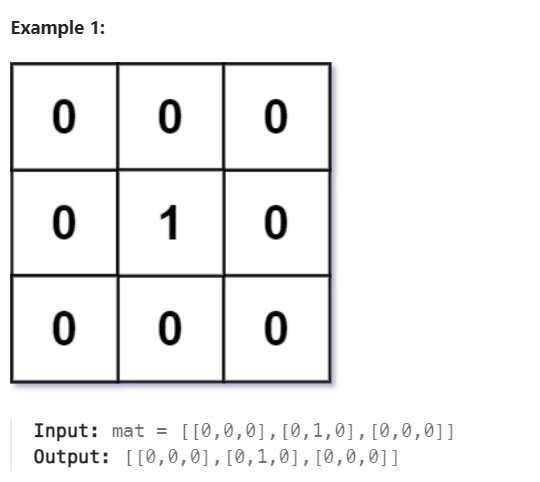

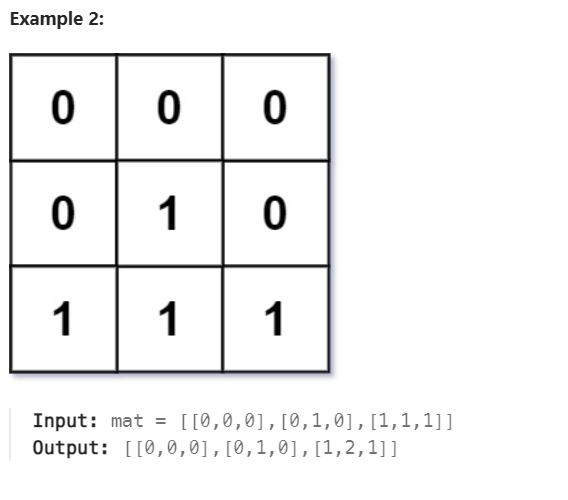

In [3]:
from collections import deque
class Solution(object):
    def updateMatrix(self, mat):
        """
        :type mat: List[List[int]]
        :rtype: List[List[int]]
        """
        n = len(mat)
        m = len(mat[0])
        vis = [[0]*m for i in range(n)]
        dis = [[0]*m for i in range(n)]
        q = deque()
        ## Now let's find out the zeros in the matrix and store it in the queue and visite it in visited array
        for i in range(n):
            for j in range(m):
                if mat[i][j]==0:
                    q.append(((i,j),0))
                    vis[i][j] = 1
                else:
                    vis[i][j] = 0
        ## now we have to travese in all 4 direction so let's writ the co-ordination for all
        del_row = [-1, 0, 1, 0]
        del_col = [0, 1, 0, -1]
        while q:
            (row,col),step = q.popleft()
            dis[row][col] = step
            for i in range(4):
                n_row = row + del_row[i]
                n_col = col + del_col[i]
                if(0<=n_row<n and 0<= n_col<m and vis[n_row][n_col]==0):
                    vis[n_row][n_col] = 1
                    q.append(((n_row,n_col), step+1))

        return dis

mat = [[0,0,0],[0,1,0],[0,0,0]] 
mat1 = [[0,0,0],[0,1,0],[1,1,1]]
sol = Solution()
print(f"distance of the Zero : {sol.updateMatrix(mat)}")
print(f"distance of the zreo : {sol.updateMatrix(mat1)}")

distance of the Zero : [[0, 0, 0], [0, 1, 0], [0, 0, 0]]
distance of the zreo : [[0, 0, 0], [0, 1, 0], [1, 2, 1]]


<h3 style="text-align: center;">Intuition and Approach I followed</h3>



#### Intuition:
The key idea here is to leverage the Breadth-First Search (BFS) traversal method. BFS is optimal for finding the shortest path in an unweighted grid, which makes it a perfect fit for this problem.

Instead of starting from every cell with a `1` and trying to find the nearest `0`, we can flip the problem around: start BFS from all `0`s simultaneously, and propagate the distances to neighboring `1`s. This way, the first time we reach a `1` from a `0`, we are guaranteed that it is the shortest distance to a `0` for that `1`.

#### Approach:
1. **Initialization**:
   - Create two matrices: `vis` (visited matrix) and `dis` (distance matrix), both of the same size as the input matrix.
   - Initialize a queue (`q`) for BFS traversal.

2. **Starting BFS from All Zeros**:
   - Traverse the entire matrix and enqueue all cells that contain `0`. Mark these cells as visited in the `vis` matrix and set their corresponding distances to `0` in the `dis` matrix.

3. **BFS Traversal**:
   - Dequeue a cell from the front of the queue.
   - For each cell, explore its four neighbors (up, down, left, right).
   - If a neighboring cell is within bounds, unvisited, and contains a `1`, update its distance to be `step + 1` (where `step` is the distance of the current cell). Then, mark this neighbor as visited and enqueue it.

4. **Final Output**:
   - Once the BFS completes, the `dis` matrix will contain the shortest distance to the nearest `0` for each cell in the input matrix.

#### Time Complexity (TC):
- **O(m * n)**: We visit each cell at most once, and each cell enqueues its neighbors only if they haven't been visited. Since BFS processes each cell and its edges in constant time, the overall time complexity is linear relative to the number of cells.

#### Space Complexity (SC):
- **O(m * n)**: The space required for the queue, `vis` matrix, and `dis` matrix is all proportional to the number of cells in the matrix.


### **Question :Surrounded Regions**

You are given an m x n matrix board containing letters 'X' and 'O', capture regions that are surrounded:
Connect: A cell is connected to adjacent cells horizontally or vertically.
Region: To form a region connect every 'O' cell.
Surround: The region is surrounded with 'X' cells if you can connect the region with 'X' cells and none of the region cells are on the edge of the board.
A surrounded region is captured by replacing all 'O's with 'X's in the input matrix board.

 

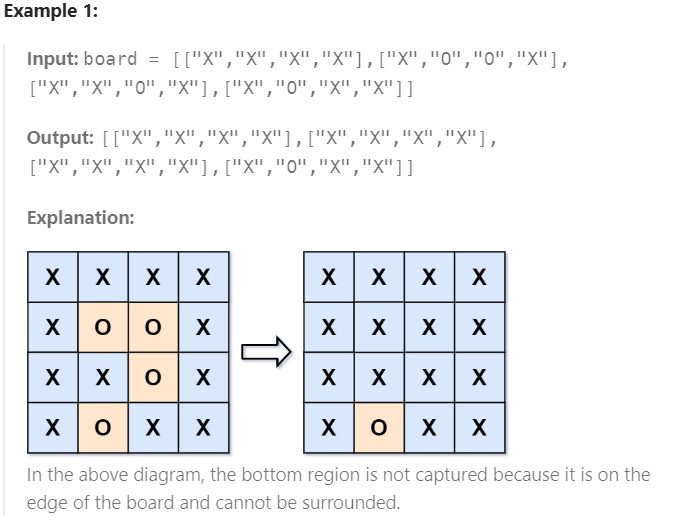

#### Using BFS

In [2]:
from collections import deque

class Solution(object):
    def bfs(self, row, col, vis, board, delrow, delcol):
        queue = deque([(row, col)])
        vis[row][col] = 1
        while queue:
            r, c = queue.popleft()
            for i in range(4):
                nrow = r + delrow[i]
                ncol = c + delcol[i]
                if (0 <= nrow < len(board) and 0 <= ncol < len(board[0]) and
                    not vis[nrow][ncol] and board[nrow][ncol] == 'O'):
                    vis[nrow][ncol] = 1
                    queue.append((nrow, ncol))

    def solve(self, board):
        """
        :type board: List[List[str]]
        :rtype: None Do not return anything, modify board in-place instead.
        """
        if not board or not board[0]:
            return
        
        n = len(board)
        m = len(board[0])
        vis = [[0]*m for _ in range(n)]

        delrow = [-1, 0, 1, 0]
        delcol = [0, 1, 0, -1]

        # Traverse the boundary cells
        for j in range(m):
            if not vis[0][j] and board[0][j] == 'O':
                self.bfs(0, j, vis, board, delrow, delcol)
            if not vis[n-1][j] and board[n-1][j] == 'O':
                self.bfs(n-1, j, vis, board, delrow, delcol)

        for i in range(n):
            if not vis[i][0] and board[i][0] == 'O':
                self.bfs(i, 0, vis, board, delrow, delcol)
            if not vis[i][m-1] and board[i][m-1] == 'O':
                self.bfs(i, m-1, vis, board, delrow, delcol)

        # Replace all remaining 'O's with 'X's, as they are surrounded
        for i in range(n):
            for j in range(m):
                if not vis[i][j] and board[i][j] == 'O':
                    board[i][j] = 'X'

        return board


board = [["X","X","X","X"],
         ["X","O","O","X"],
         ["X","X","O","X"],
         ["X","O","X","X"]]
sol = Solution()
sol.solve(board)


for row in board:
    print(row)


['X', 'X', 'X', 'X']
['X', 'X', 'X', 'X']
['X', 'X', 'X', 'X']
['X', 'O', 'X', 'X']


#### Using DFS

In [4]:
class Solution(object):
    def dfs(self,row, col,vis, board, delrow, delcol):
        vis[row][col] = 1
        n = len(board)
        m = len(board[0])
        for i in range(4):
            nrow = row + delrow[i]
            ncol = col + delcol[i]
            if (0<=nrow<n and 0<=ncol<m and not vis[nrow][ncol]
            and board[nrow][ncol]=='O'):
                self.dfs(nrow,ncol, vis, board, delrow, delcol)

    def solve(self, board):
        """
        :type board: List[List[str]]
        :rtype: None Do not return anything, modify board in-place instead.
        """
        n = len(board)
        m = len(board[0])
        vis = [[0]*m for _ in range(n)]

        delrow = [-1,0,1,0]
        delcol = [0,1,0,-1]

        ## Let's travers into the board from first row and last row for finding out the O's 
        for j in range(m):
            ## First row
            if not vis[0][j] and board[0][j]=='O':
                self.dfs(0,j,vis,board,delrow,delcol)
            ## last row
            if not vis[n-1][j] and board[n-1][j] == 'O':
                self.dfs(n-1, j, vis,board, delrow, delcol)

        ## Now let's travers in last col and first col
        for i in range(n):
            # first columns
            if not vis[i][0] and board[i][0] == "O":
                self.dfs(i, 0, vis, board, delrow, delcol)
            ## last columns
            if not vis[i][m-1] and board[i][m-1] == "O":
                self.dfs(i, m-1, vis, board, delrow, delcol)
        ## Now let's check the remains O's , if it is not touch into the boundaries and also not visited into the visted matrix
        for i in range(n):
            for j in range(m):
                if not vis[i][j] and board[i][j] == 'O':
                    board[i][j] = 'X'
        return board


board = [["X","X","X","X"],["X","O","O","X"],["X","X","O","X"],["X","O","X","X"]]
sol = Solution()
sol.solve(board)

[['X', 'X', 'X', 'X'],
 ['X', 'X', 'X', 'X'],
 ['X', 'X', 'X', 'X'],
 ['X', 'O', 'X', 'X']]

<h3 style="text-align: center;">Intuition and Approach I followed</h3>

### Intuition
The problem is to find and fill all regions surrounded by 'X' on a 2D board where 'O' represents open cells and 'X' represents cells that are blocked. The regions of 'O's that are not connected to the boundary of the board should be converted to 'X'. This problem can be visualized as identifying connected components in a grid where we need to mark regions that are fully surrounded by a different value.

### Approach

1. **Identify Boundary 'O's:** 
   - The key insight is to identify which 'O's on the boundary of the board or connected to boundary 'O's should not be changed. We do this by performing a DFS from each 'O' on the boundary and marking all reachable 'O's. 

2. **DFS Traversal:**
   - Perform a Depth-First Search (DFS) starting from each 'O' found on the boundary. This traversal will mark all 'O's that are connected directly or indirectly to the boundary.
   - Use a `visited` matrix to keep track of which cells have been processed.

3. **Fill Surrounded Regions:**
   - After marking all 'O's connected to the boundary, iterate through the board again. For each unvisited 'O', change it to 'X'. These are the 'O's that are surrounded by 'X's and should be filled.

### Time Complexity
- **DFS Traversal Time Complexity:** O(N * M), where N is the number of rows and M is the number of columns in the board. Each cell is visited once during the DFS traversal.

### Space Complexity
- **Visited Matrix Space Complexity:** O(N * M) for the `visited` matrix used to keep track of processed cells.
- **Recursive Call Stack Space Complexity:** In the worst case, the call stack can grow to O(N * M) if all cells are part of a single connected component.


### **Question** :Number of Enclaves

You are given an m x n binary matrix grid, where 0 represents a sea cell and 1 represents a land cell.

A move consists of walking from one land cell to another adjacent (4-directionally) land cell or walking off the boundary of the grid.

Return the number of land cells in grid for which we cannot walk off the boundary of the grid in any number of moves.


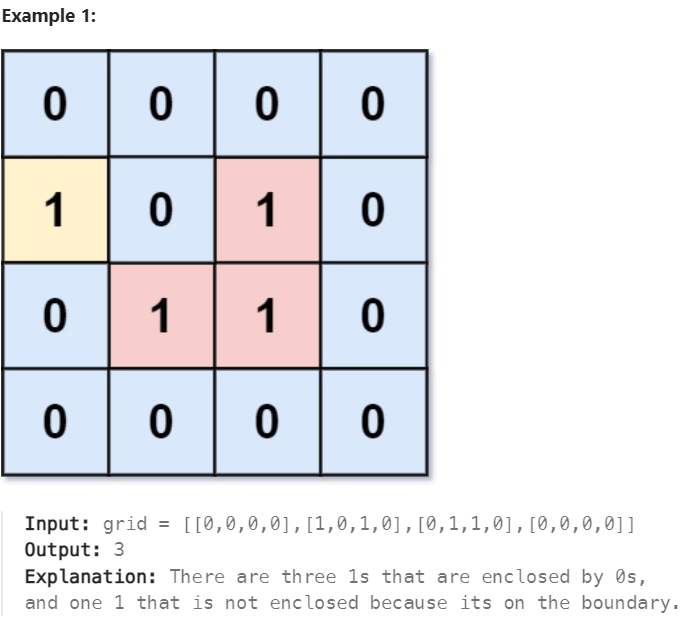 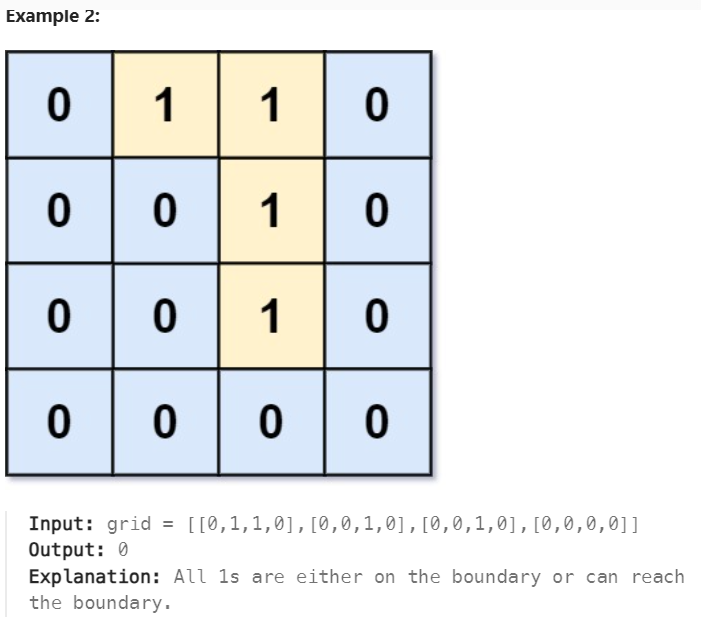

#### Using BFS

In [5]:
from collections import deque
class Solution(object):
    def numEnclaves(self, grid):
        """
        :type grid: List[List[int]]
        :rtype: int
        """
        q = deque()
        n = len(grid)
        m = len(grid[0])
        vis = [[0]*m for _ in range(n)]

        ## Now let's traverse through with 1st row, 1st col, last col, last row
        for i in range(n):
            for j in range(m):
                ## now let's find out the boundaris one's and append it in the queue and visit it as well
                if (i==0 or j ==0 or i == n-1 or j== m-1):
                    if grid[i][j] == 1:
                        q.append((i,j))
                        vis[i][j] = 1
        ## now let's write all 4 direction coordinates
        delrow = [-1, 0, 1, 0]
        delcol = [0, 1, 0, -1]
        ## now let's Travers though all the 4 direction using Bfs
        while q:
            r,c = q.popleft()
            for i in range(4):
                nrow = r + delrow[i]
                ncol = c + delcol[i]
                if (0<= nrow< n and 0<= ncol <m and vis[nrow][ncol]==0 and grid[nrow][ncol]==1):
                    q.append((nrow, ncol))
                    vis[nrow][ncol] = 1
        ## Last step is to find out those ones which is not touch with the boundary and not visited 
        cnt =0
        for i in range(n):
            for j in range(m):
                if grid[i][j] ==1 and vis[i][j]==0:
                    cnt +=1
        return cnt
    
grid = [[0,0,0,0],[1,0,1,0],[0,1,1,0],[0,0,0,0]]
sol = Solution()
sol.numEnclaves(grid)

3

#### Using DFS

In [1]:
class Solution:
    def numEnclaves(self, grid):
        n = len(grid)
        m = len(grid[0])
        vis = [[0]*m for _ in range(n)]
        delrow = [-1, 0, 1, 0]
        delcol = [0, 1, 0, -1]

        def dfs(r, c):
            # Mark the current cell as visited
            vis[r][c] = 1
            for i in range(4):
                nrow = r + delrow[i]
                ncol = c + delcol[i]
                if (0 <= nrow < n and 0 <= ncol < m and vis[nrow][ncol] == 0 and grid[nrow][ncol] == 1):
                    dfs(nrow, ncol)

        # Start DFS from all boundary land cells
        for i in range(n):
            for j in range(m):
                if (i == 0 or j == 0 or i == n - 1 or j == m - 1) and grid[i][j] == 1:
                    if vis[i][j] == 0:
                        dfs(i, j)

        # Count land cells that are not reachable from the boundary
        cnt = 0
        for i in range(n):
            for j in range(m):
                if grid[i][j] == 1 and vis[i][j] == 0:
                    cnt += 1

        return cnt

grid = [[0,0,0,0],[1,0,1,0],[0,1,1,0],[0,0,0,0]]
sol = Solution()
print(sol.numEnclaves(grid))  


3


<h3 style="text-align: center;">Intuition and Approach I followed</h3>

### Intuition

1. **Boundary Cells and Reachability:**
   - Any land cell (`1`) connected to the boundary of the grid can potentially reach the boundary and thus should not be counted as an enclosed land cell.
   - Similarly, if a land cell is connected to any land cell that is on the boundary (through adjacent land cells), it also cannot be enclosed.

2. **Counting Enclosed Cells:**
   - Cells that are not reachable from the boundary or are not connected to any boundary land cells are completely enclosed by sea cells. These are the cells that should be counted.

### Approach

1. **Initialize BFS/DFS Setup:**
   - Create a queue for BFS traversal (or use a stack for DFS).
   - Initialize a `visited` matrix to keep track of cells that have been processed.

2. **Find and Process Boundary Cells:**
   - Traverse the boundary of the grid (first row, last row, first column, last column).
   - For every land cell (`1`) found on the boundary, add it to the queue and mark it as visited.

3. **Perform BFS/DFS:**
   - Process cells from the queue (or stack) and explore their 4-directional neighbors.
   - If a neighbor is within bounds, is unvisited, and is a land cell, add it to the queue and mark it as visited.

4. **Count Enclosed Land Cells:**
   - After the BFS/DFS traversal is complete, iterate over the entire grid.
   - Count cells that are land cells (`1`) but have not been visited during the traversal. These are the enclosed land cells.

5. **Return the Count:**
   - The count of these enclosed cells is the desired result.

### Time Complexity (TC) and Space Complexity (SC)

- **Time Complexity:**
  - The BFS/DFS traversal visits each cell of the grid exactly once. Therefore, the time complexity is \( O(m \times n) \), where \( m \) is the number of rows and \( n \) is the number of columns in the grid.

- **Space Complexity:**
  - The space complexity is determined by the space used for the queue (or stack) and the `visited` matrix.
  - The `visited` matrix requires \( O(m \times n) \) space.
  - The queue (or stack) can hold up to \( O(m \times n) \) elements in the worst case.
  - Thus, the overall space complexity is \( O(m \times n) \).

### **Question :**
You are given an m x n binary matrix grid. An island is a group of 1's (representing land) connected 4-directionally (horizontal or vertical.) You may assume all four edges of the grid are surrounded by water.

An island is considered to be the same as another if and only if one island can be translated (and not rotated or reflected) to equal the other.

Return the number of distinct islands.

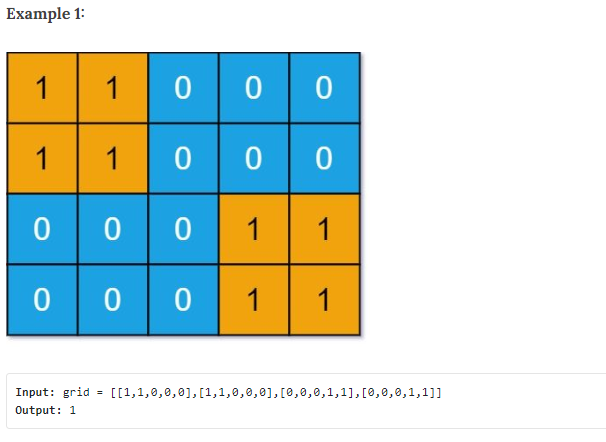  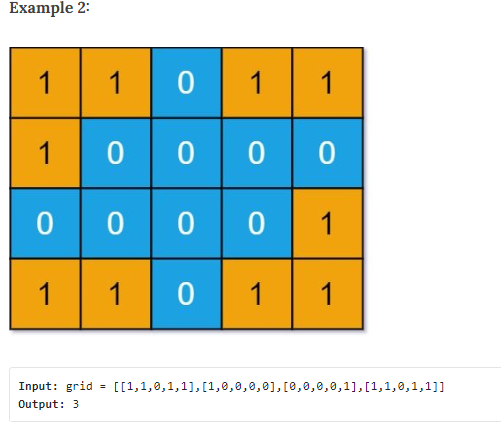

In [6]:
class Solution:
    def dfs(self, row, col, vis, grid, vec, row0, col0):
        vis[row][col] = 1 ## Marking the current node as visited
        ## Now let's store the relative position of the cell 
        vec.append((row-row0, col-col0))
        n = len(grid) 
        m = len(grid[0]) 

        ## let's write the coordition for all 4 direction
        delrow = [-1, 0, 1, 0]
        delcol = [0, 1, 0, -1]

        ## now let's do the traversel in all 4 direction
        for i in range(4):
            nrow = row + delrow[i]
            ncol = col + delcol[i]

            ## Now let's check if the neigbhor is valid, unvisited and it's a part of island
            if (0<= nrow< n and 0<= ncol < m and not vis[nrow][ncol] and grid[nrow][ncol] == 1):
                self.dfs(nrow, ncol, vis, grid, vec, row0, col0)

    def countDistinctIslands(self, grid):
        n = len(grid)
        m = len(grid[0])
        vis = [[0]*m for _ in range(n)]

        st = set()

        ## Now let's Traverse the entire grid
        for i in range(n):
            for j in range(m):
                ## now let's checck if there is a island and that one is not visted then perform the dfs
                if grid[i][j] ==1 and not vis[i][j]:
                    vec = []
                    self.dfs(i,j,vis,grid, vec,i,j)
                    st.add(tuple(vec))
        return len(st)
    
grid = [
    [1, 1, 0, 0, 0],
    [1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1],
    [0, 0, 0, 1, 1]
]

# grid1 = [
#     [1, 1, 0, 1, 1],
#     [1, 0, 0, 0, 0],
#     [0, 0, 0, 1, 1],
#     [1, 1, 0, 1, 0]
# ]

sol = Solution()
print(sol.countDistinctIslands(grid))
# print(sol.countDistinctIslands(grid1))

1
2


### Let's solve using BFS

In [ ]:
from collections import deque
class Solution:
    def bfs(self, row, col, vis, grid, vec, row0, col0):
        vis[row][col] = 1 ## Let's mark the current node as visited
        n = len(grid)
        m = len(grid[0])

        ## Let's initialize queue with the starting postion
        q = deque()
        q.append((row, col))

        # now let's append the relative position of the starting cell
        vec.append((row - row0, col - col0))

        ## Now let's Travese in all 4 direction
        delrow = [-1,0,1,0]
        delcol = [0,1,0,-1]

        ## Now let's Apply BFS traversal
        while q:
            r,c = q.popleft()
            ## now let's check all 4 direction
            for i in range(4):
                nrow = r + delrow[i]
                ncol = r + delcol[i]

                ## Check if the neighbor is valid, unvisited, and part of the island
                if (0<= nrow <n and 0<=ncol<m and not vis[nrow][ncol] and grid[nrow][ncol] == 1 ):
                    vis[nrow][ncol] = 1
                    q.append((nrow, ncol))
                    vec.append(nrow - row0, ncol - col0)

    def countDistinctIslands(self, grid):
        n = len(grid)
        m = len(grid[0])
        vis = [[0]*m for _ in range(n)]

        st = set()
        for i in range(n):
            for j in range(m):
                ## So let's Travers if it's part of an island and visited, start BFS
                if grid[i][j] == 1 and not vis[i][j]:
                    vec = []
                    self.bfs(i,)

### **Intuition:**

To solve this, we can represent an island not by its absolute positions on the grid but by its relative positions with respect to a reference cell. This way, we can compare islands by comparing their relative shapes rather than their actual positions.

### **Approach:**

1. **Traversal (DFS)**:
   - Use Depth-First Search (DFS) to explore each island.
   - For each cell that is part of an island (denoted by `1`), initiate a DFS traversal.
   - During the DFS, record the relative positions of all cells that belong to the same island. The relative position of a cell is calculated by subtracting the initial cell's coordinates from the current cell's coordinates.
   
2. **Tracking visited cells**:
   - Maintain a 2D list `vis` to keep track of visited cells to avoid counting the same island multiple times.

3. **Storing unique islands**:
   - For each island, store the list of its relative positions (relative to the first cell in the island). This list is then converted into a tuple and stored in a set, which automatically handles uniqueness by only allowing distinct shapes.

4. **Comparing islands**:
   - By storing the relative positions of each island in a set, we can easily identify distinct islands. The set will only contain unique island shapes.

5. **Time Complexity (TC)**:
   - The algorithm iterates over all cells in the grid once, making it `O(n * m)`, where `n` is the number of rows and `m` is the number of columns. For each unvisited island cell, we perform a DFS that visits all the cells in that island, which together also takes `O(n * m)` time in the worst case.

6. **Space Complexity (SC)**:
   - The space used is for the `vis` matrix (O(n * m)) and the set of distinct islands, which could store up to O(n * m) elements in the worst case. The space complexity is thus also `O(n * m)`.

### **Key Steps:**

1. Traverse the grid, and whenever an unvisited island cell is found, initiate a DFS from that cell.
2. Track the relative positions of all cells in the island.
3. Store each island's shape as a tuple in a set.
4. The size of the set at the end gives the number of distinct islands.
